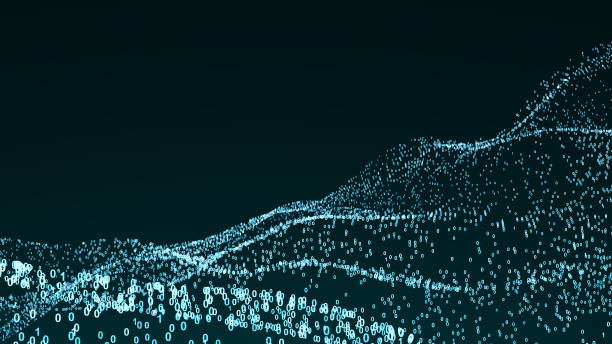

Directly or indirectly, you are always in contact with audio. Your brain is continuously processing and understanding audio data and giving you information about the environment. A simple example can be your conversations with people which you do daily. This speech is discerned by the other person to carry on the discussions. Even when you think you are in a quiet environment, you tend to catch much more subtle sounds, like the rustling of leaves or the splatter of rain. This is the extent of your connection with audio.

## Table of contents
- [Mel-Frequency Cepstral Coefficients](#mfcc)
- [Zero crossing rate](#zcr)
- [Spectral-roll off](#sro)
- [Spectral flux](#sr)
- [Chroma feature](#cf)
- [Pitch](#pitch)
- [Conclusion](#conclusion)


I am trying to share some knowledge that I acquired while researching for this competition. Librosa is a really powerful python library that can be used for retreving lot of meaningful information from audio files. I am showing few for those here. Hope you find it helpful.

In [ ]:
import librosa
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id='mfcc'></a>
## MFCC (Mel-Frequency Cepstral Coefficients)

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. MFCC is that one feature you would see being used in any machine learning experiment involving audio files. 

MFCCs are commonly derived as follows:

- Take the Fourier transform of (a windowed excerpt of) a signal.
- Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
- Take the logs of the powers at each of the mel frequencies.
- Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
- The MFCCs are the amplitudes of the resulting spectrum.

Generally the first 13 coefficients(the lower dimensions) of MFCC are taken as features as they represent the envelope of spectra. 

[reference](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)

In [ ]:
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/purfin/XC195200.mp3", offset=30, duration=5)
print(librosa.feature.mfcc(y=y, sr=sr))

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(librosa.feature.mfcc(y=y, sr=sr))
plt.grid()
plt.title('Mel-frequency cepstral coefficients')
plt.xlabel('time')
plt.ylabel('mfcc coefficients')
plt.show()

<a id='zcr'></a>
## Zero crossing rate

The zero-crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to zero to negative or from negative to zero to positive. This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/cda9c9054c26350f517732f08eb791d232b7c1ba)

[reference](https://en.wikipedia.org/wiki/Zero-crossing_rate)

In [ ]:
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/purfin/XC195200.mp3")
print(librosa.feature.zero_crossing_rate(y))

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(librosa.feature.zero_crossing_rate(y).squeeze())
plt.grid()
plt.title('Zero crossing rate')
plt.xlabel('time')
plt.ylabel('the fraction of zero crossings in the i th frame')
plt.show()

<a id='sro'></a>
## Spectral-roll off

It is a measure of the amount of the right-skewedness of the power spectrum.The spectral roll off point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies. That is, the roll-off is the frequency below which 85% of accumulated spectral magnitude is concentrated. Like the centroid, it takes on higher values for right-skewed spectra.

[reference](https://towardsdatascience.com/how-i-understood-what-features-to-consider-while-training-audio-files-eedfb6e9002b)

In [ ]:
S, phase = librosa.magphase(librosa.stft(y))
print(librosa.feature.spectral_rolloff(S=S, sr=sr))

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(librosa.feature.spectral_rolloff(S=S, sr=sr).squeeze())
plt.grid()
plt.title('Roll off frequency')
plt.xlabel('time')
plt.ylabel('Hz')
plt.show()

<a id='sf'></a>
## Spectral flux

Spectral flux is a measure of how quickly the power spectrum of a signal is changing, calculated by comparing the power spectrum for one frame against the power spectrum from the previous frame. 

In [ ]:
import librosa
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/purfin/XC195200.mp3", duration=10.0)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
print(onset_env)

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(onset_env)
plt.grid()
plt.title('Spectral flux')
plt.xlabel('time')
plt.ylabel('Onset')
plt.show()

<a id='cf'></a>
## Chroma feature

In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

[refernece](https://en.wikipedia.org/wiki/Chroma_feature)

In [ ]:
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/purfin/XC195200.mp3")
print(librosa.feature.chroma_stft(y=y, sr=sr))

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(librosa.feature.chroma_stft(y=y, sr=sr).squeeze())
plt.grid()
plt.title('Chroma feature')
plt.xlabel('time')
plt.ylabel('energy for each chroma bin at each frame')
plt.show()

<a id='pitch'></a>
## Pitch

Pitch is a perceptual property of sounds that allows their ordering on a frequency-related scale, or more commonly, pitch is the quality that makes it possible to judge sounds as "higher" and "lower" in the sense associated with musical melodies. Pitch can be determined only in sounds that have a frequency that is clear and stable enough to distinguish from noise. Pitch is a major auditory attribute of musical tones, along with duration, loudness, and timbre.

[reference](https://en.wikipedia.org/wiki/Pitch_(music))

In [ ]:
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/purfin/XC195200.mp3")
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
print(pitches)

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(pitches.squeeze())
plt.grid()
plt.title('Pitch')
plt.show()

<a id='conclusion'></a>
## Conclusion

- We have seen a small set of useful features that can be retrived using the librosa library. 
- There are a lot of features like this that can come in handy when doing audio analysis.
- Go on an experiment with these features

<h2 style="background-color:powderblue;">If you find this work useful please consider upvoting. It will motivate me to make more kernels like this.</h2>